In [ ]:
import keras
import keras.layers as L
import keras.initializers as init
import tensorflow as tf

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
net = keras.models.Sequential()



net.add(L.Conv2D(filters = 32, kernel_size = 5, activation = 'relu', 
                 input_shape = (28,28,1)))


net.add(L.Conv2D(filters = 32, kernel_size = 5))


net.add(L.Activation('relu'))
net.add(L.MaxPool2D(pool_size = 2))
net.add(L.Dropout(rate=0.25))

net.add(L.Conv2D(filters = 64, kernel_size = 3,  
                 activation = 'relu'))


        
net.add(L.Conv2D(filters = 64, kernel_size = 3))



net.add(L.Activation('relu'))

net.add(L.MaxPool2D(pool_size = 2))
net.add(L.Dropout(rate=0.25))
net.add(L.Flatten())
        
        
net.add(L.Dense(units = 256))


net.add(L.Activation('relu'))


net.add(L.Dense(units = 128))

net.add(L.Activation('relu'))

net.add(L.Dense(units = 84))

net.add(L.Activation('relu'))
net.add(L.Dropout(rate=0.25))

net.add(L.Dense(units = 10, activation = 'softmax'))
net.summary()

net.compile( optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)
net.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=5, batch_size=128)
accuracy = net.evaluate(X_train, y_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
activation (Activation)      (None, 20, 20, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          3

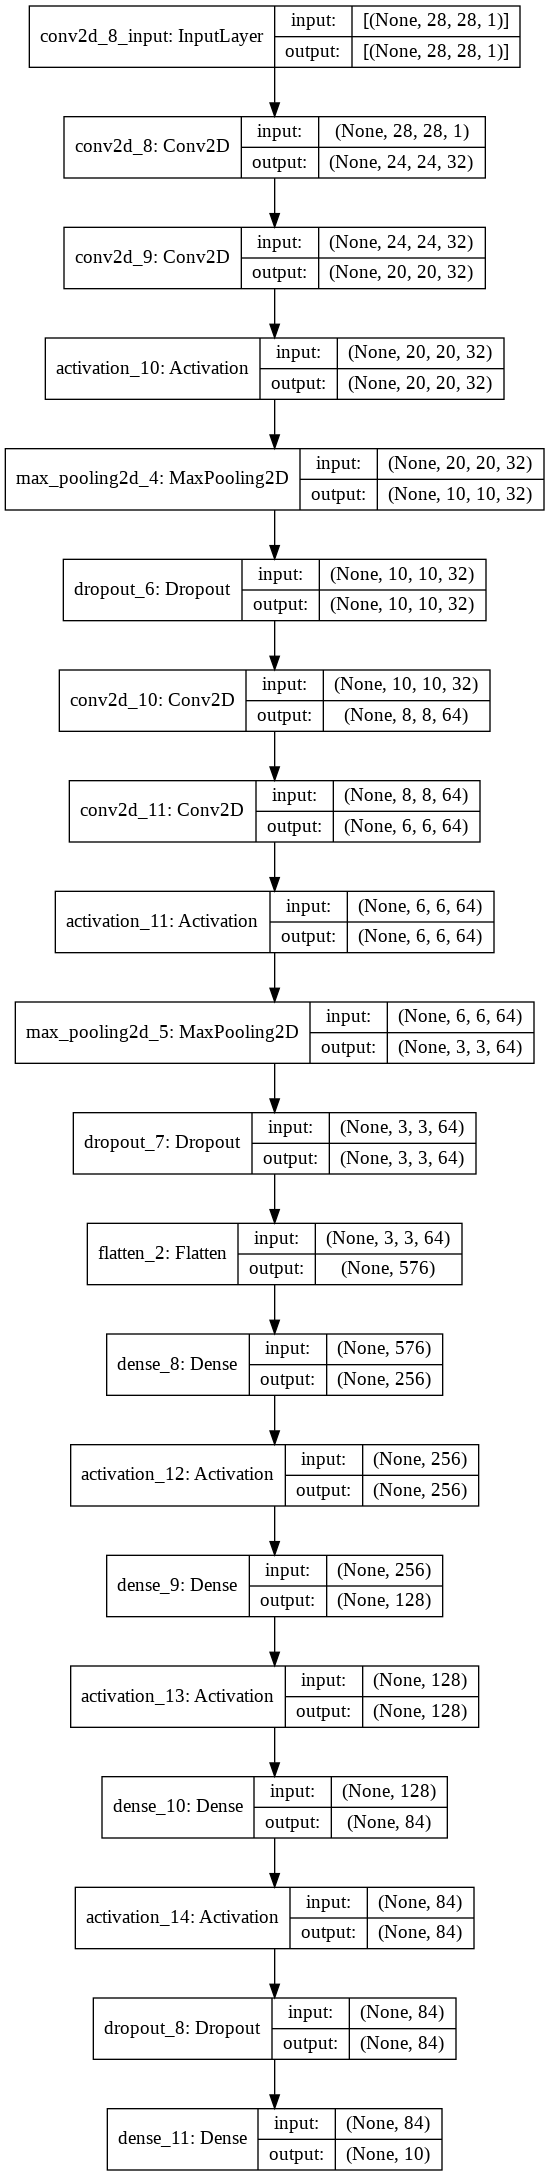

In [ ]:
tf.keras.utils.plot_model(net, to_file='model.png', show_shapes=True)
model.summary()